In [1]:
import pandas as pd
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("card_transdata.csv")

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
#Dimension of the dataset
print(f"Dataset dimension: {df.shape}\n")
#Data types of the fields
print(f"Datatype: \n{df.dtypes}\n")
#Number of data records
print(f"Number of records: {df.shape[0]}")
print(f'Number of features: {df.shape[1] -1}')

Dataset dimension: (109970, 8)

Datatype: 
distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

Number of records: 109970
Number of features: 7


In [22]:
df['fraud'].value_counts().reset_index()

,fraud,count
0,0.0,912597
1,1.0,87403


In [23]:
(df[df['fraud'] == 1].shape[0])/(df[df['fraud'] ==0].shape[0])

0.09577392868922427

There are 87,403 fraudulent transactions and 912,597 non-fraudulent transactions in this dataset. Only 0.095% of the records are fraud

The dataset is highly im-balanced, sampling techniques is required.

## Exploratory Data Analysis

In [4]:
## Balancing the dataset using SMOTE
# smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)
y = df['fraud']
x = df.drop(columns='fraud')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [6]:
xy_train = x_train.copy()
xy_train['fraud'] = y_train

In [27]:
xy_train.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

# Undersampling to balance the dataset

In [28]:
y_train.describe()

,fraud
count,800000.000000
mean,0.087450
std,0.282494
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [29]:
y_train.shape

(800000,)

In [7]:
x_res, y_res = rus.fit_resample(x_train, y_train)

In [8]:
xy_train_sampled = x_res.copy()
xy_train_sampled['fraud'] = y_res

In [9]:
xy_train_sampled['fraud'].value_counts()

,count
fraud,
0.0,69960
1.0,69960


In [33]:
print(xy_train_sampled['distance_from_home'].max())
print(xy_train_sampled['distance_from_home'].min())
print(xy_train_sampled['distance_from_home'].mean())

8777.136419511795
0.0225987966071393
44.51212696038077


In [34]:
xy_train_sampled['distance_from_home'].sort_values(ascending=False)

,distance_from_home
847723,8777.136420
174622,4394.314607
395167,3986.278366
546567,3695.070179
929335,3509.712374
...,...
510615,0.037825
179629,0.032026
78392,0.030511
888520,0.025847


In [35]:
xy_train_sampled[xy_train_sampled['distance_from_home'] > 1000].shape

(185, 8)

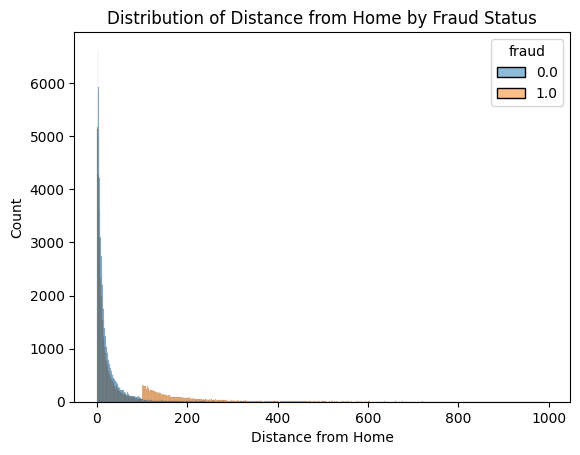

In [ ]:
#Distance from home
sns.histplot(data=xy_train_sampled[xy_train_sampled['distance_from_home'] <1000], x='distance_from_home', hue='fraud')
plt.title("Distribution of Distance from Home by Fraud Status")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()

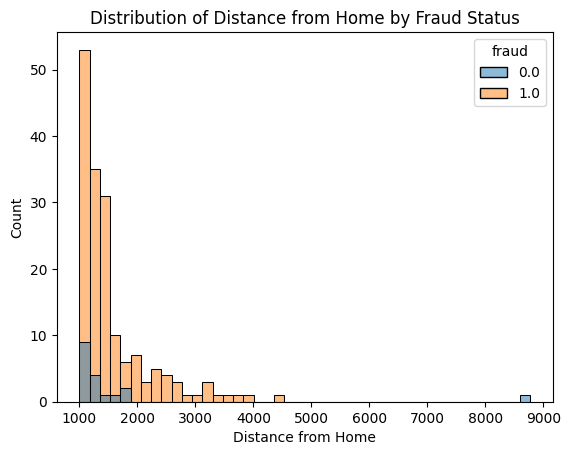

In [ ]:
#Distance from home
sns.histplot(data=xy_train_sampled[xy_train_sampled['distance_from_home'] >1000], x='distance_from_home', hue='fraud')
plt.title("Distribution of Distance from Home by Fraud Status")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()

In [38]:
xy_train_sampled['distance_from_last_transaction'].describe()

,distance_from_last_transaction
count,139920.000000
mean,8.478532
std,36.506768
min,0.000407
25%,0.311281
50%,1.067363
75%,3.836370
max,2938.197853


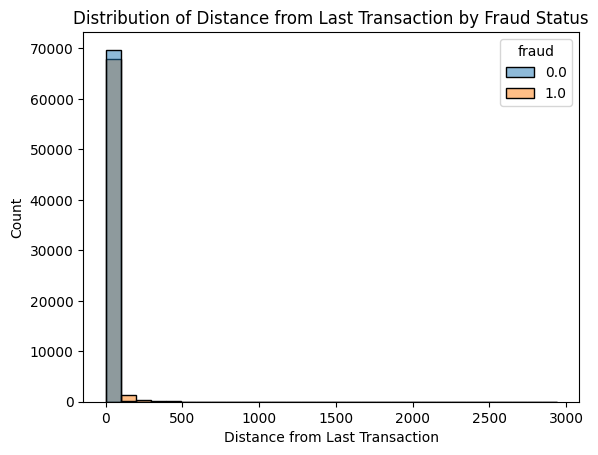

In [13]:
#Distance from last transaction
sns.histplot(data=xy_train_sampled, x='distance_from_last_transaction', hue='fraud', bins=30)
plt.title("Distribution of Distance from Last Transaction by Fraud Status")
plt.xlabel("Distance from Last Transaction")
plt.ylabel("Count")
plt.show()

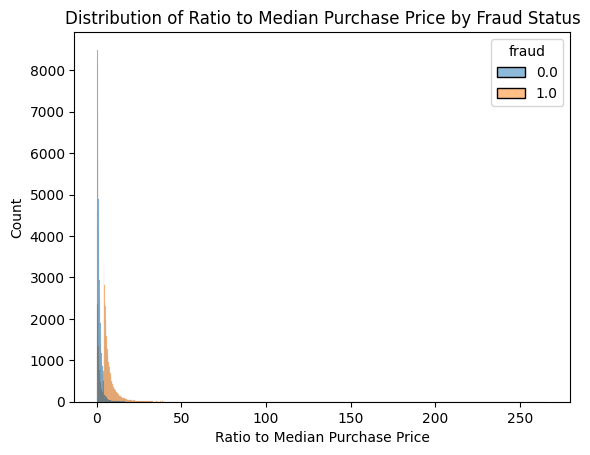

In [14]:
#ratio to median purchase price
sns.histplot(data=xy_train_sampled, x='ratio_to_median_purchase_price', hue='fraud')
plt.title("Distribution of Ratio to Median Purchase Price by Fraud Status")
plt.xlabel("Ratio to Median Purchase Price")
plt.ylabel("Count")
plt.show()

In [18]:
xy_train_sampled[xy_train_sampled['repeat_retailer'] == 1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
657781,43.572007,1.644510,1.389484,1.0,0.0,0.0,1.0,0.0
885136,2.613539,0.978110,0.374801,1.0,0.0,0.0,1.0,0.0
482720,48.308497,0.836099,5.764638,1.0,0.0,0.0,0.0,0.0
512549,11.694269,0.052104,0.276512,1.0,1.0,0.0,1.0,0.0
55314,7.363928,17.872965,0.218058,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
349457,360.324661,1.251821,7.346751,1.0,0.0,0.0,1.0,1.0
989436,150.389409,2.323422,1.631478,1.0,0.0,0.0,1.0,1.0
912756,39.288265,0.110789,4.524242,1.0,0.0,0.0,1.0,1.0
954698,14.117384,0.125768,4.161038,1.0,0.0,0.0,1.0,1.0


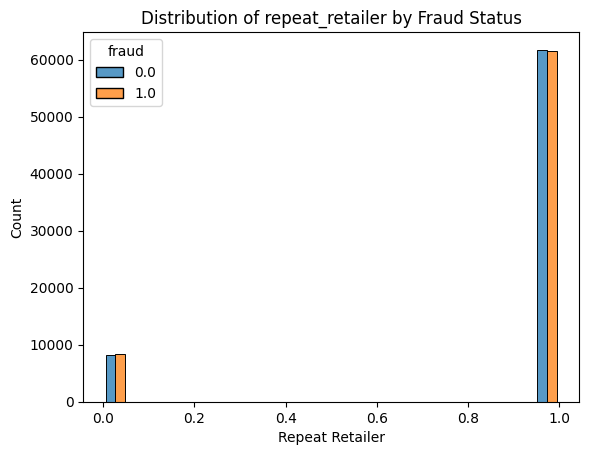

In [19]:
#Repeat Retailer
sns.histplot(data=xy_train_sampled, x='repeat_retailer', hue='fraud', multiple='dodge', shrink=0.8)
plt.title("Distribution of repeat_retailer by Fraud Status")
plt.xlabel("Repeat Retailer")
plt.ylabel("Count")
plt.show()

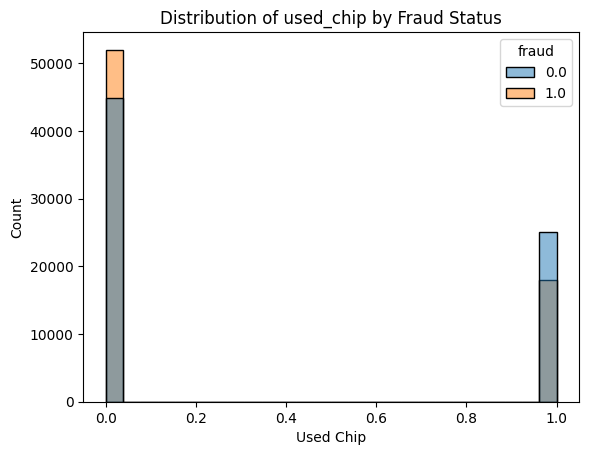

In [20]:
#ratio to median purchase price
sns.histplot(data=xy_train_sampled, x='used_chip', hue='fraud')
plt.title("Distribution of used_chip by Fraud Status")
plt.xlabel("Used Chip")
plt.ylabel("Count")
plt.show()

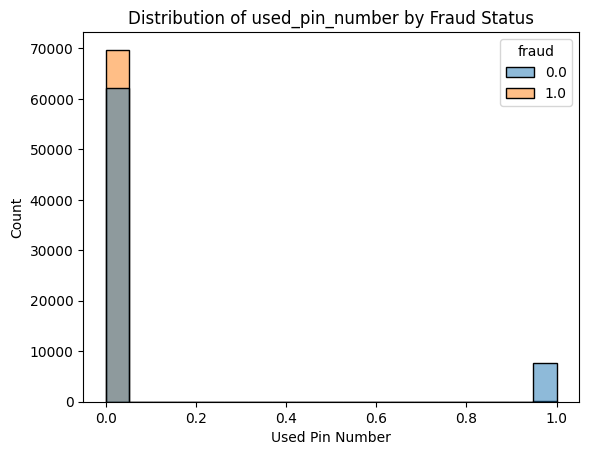

In [21]:
sns.histplot(data=xy_train_sampled, x='used_pin_number', hue='fraud')
plt.title("Distribution of used_pin_number by Fraud Status")
plt.xlabel("Used Pin Number")
plt.ylabel("Count")
plt.show()

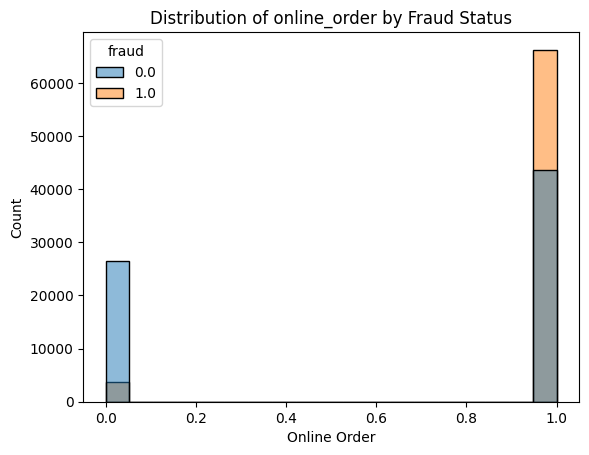

In [22]:
sns.histplot(data=xy_train_sampled, x='online_order', hue='fraud')
plt.title("Distribution of online_order by Fraud Status")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

In [ ]:
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
x_train.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [ ]:
scaled_df = pd.DataFrame(x_train_scale, columns=x_train.columns)
scaled_df['fraud'] = y_train
scaled_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,639925.000000
mean,0.003032,0.000424,0.006828,0.881516,0.350356,0.100681,0.650567,0.087256
std,0.007430,0.002226,0.010479,0.323180,0.477082,0.300906,0.476791,0.282209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000442,0.000025,0.001767,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001135,0.000084,0.003725,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.002932,0.000283,0.007844,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


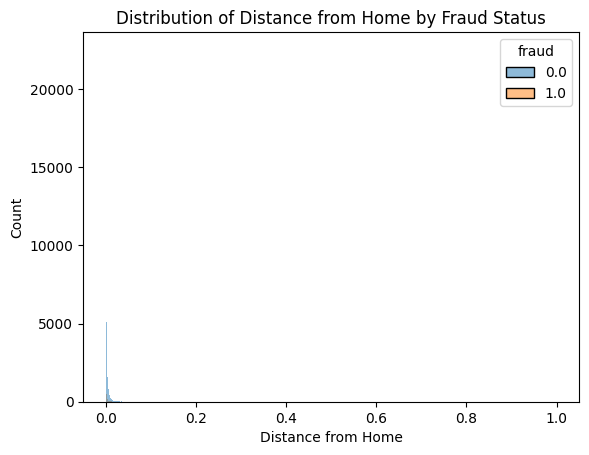

In [ ]:
sns.histplot(data=scaled_df, x='distance_from_home', hue='fraud')
plt.title("Distribution of Distance from Home by Fraud Status")
plt.xlabel("Distance from Home")
plt.ylabel("Count")
plt.show()

In [ ]:
scaled_df[scaled_df['fraud'] == 1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,0.001987,0.000144,0.002380,1.0,1.0,0.0,0.0,1.0
24,0.005809,0.000114,0.006881,1.0,1.0,0.0,0.0,1.0
29,0.000136,0.000276,0.000747,0.0,1.0,0.0,1.0,1.0
35,0.000467,0.000150,0.003217,1.0,0.0,0.0,1.0,1.0
47,0.000885,0.000665,0.000820,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
799952,0.000811,0.000002,0.003337,1.0,1.0,0.0,1.0,1.0
799957,0.000308,0.000279,0.011033,1.0,1.0,0.0,1.0,1.0
799969,0.005461,0.003191,0.009200,1.0,1.0,0.0,0.0,1.0
799980,0.003670,0.000415,0.005500,1.0,1.0,0.0,0.0,1.0


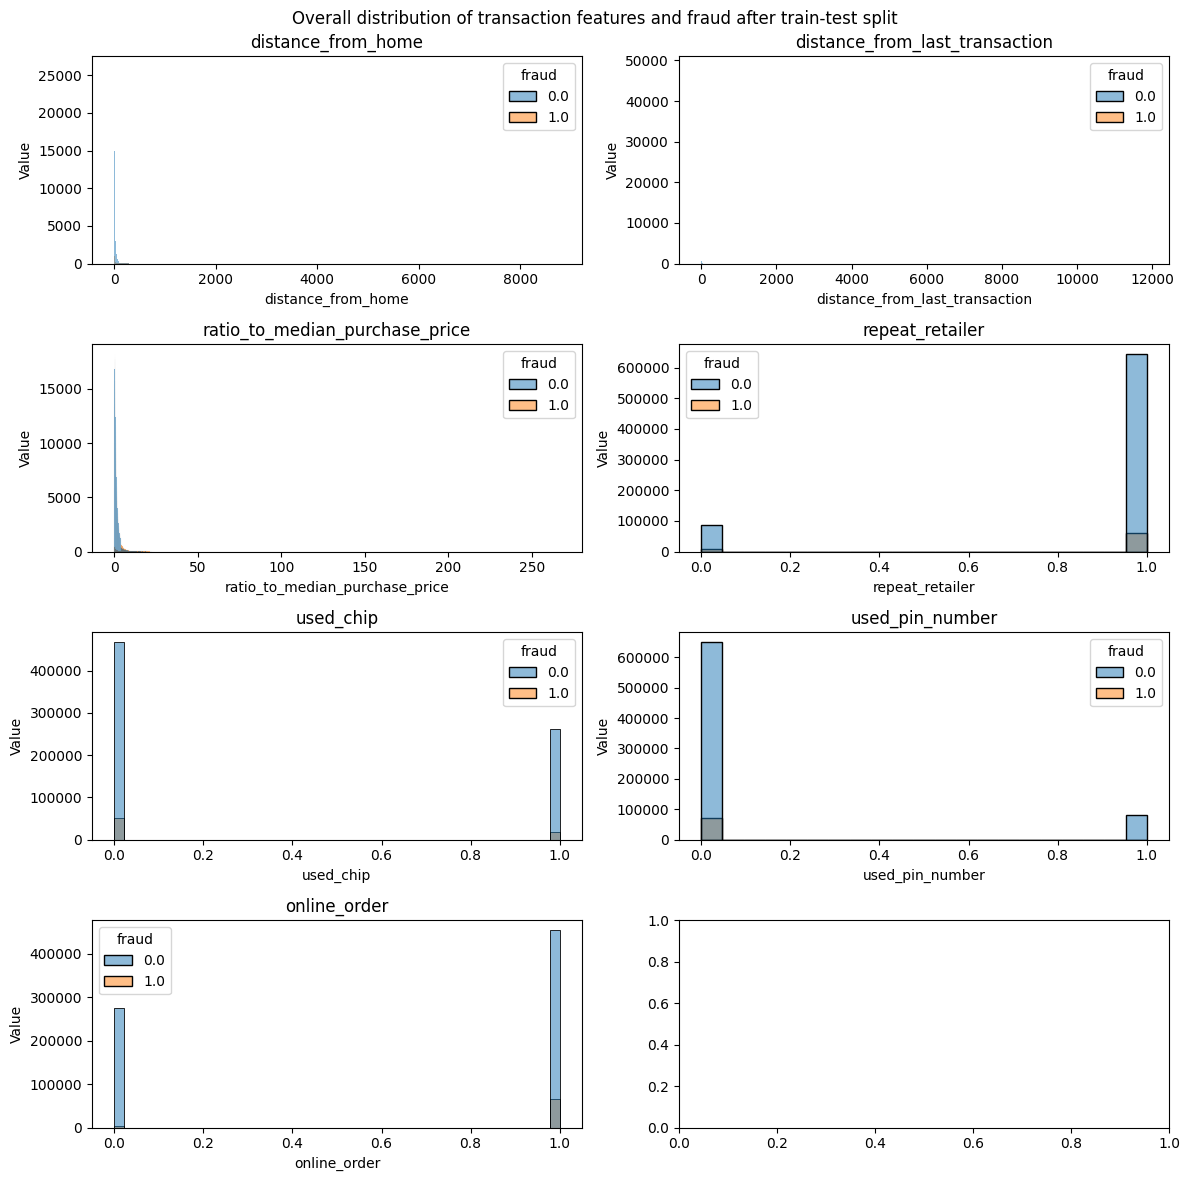

In [ ]:
#Plotting the dataset on unsampled data
features = xy_train.columns.tolist()[:-1]
fig, axes = plt.subplots(4, 2, figsize = (12,12))
axes = axes.ravel()

for i, feature in enumerate(features):
  sns.histplot(data=xy_train, x=feature, hue='fraud', ax=axes[i])
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Value')
  axes[i].set_title(f"{feature}")

plt.suptitle('Overall distribution of transaction features and fraud after train-test split')
plt.tight_layout()
plt.show()

In [ ]:
y_test.value_counts().reset_index()
#There are sufficient minority data in the testing dataset

,fraud,count
0,0.0,182557
1,1.0,17443


In [ ]:
df[df['fraud'] == 1].head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [ ]:
df[df['fraud'] == 0].head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_bal.value_counts().reset_index()

,fraud,count
0,0.0,730040
1,1.0,730040


In [ ]:
xy_train_bal = x_train_bal.copy()
xy_train_bal['fraud'] = y_train_bal

In [ ]:
xy_train[xy_train['fraud'] == 1].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.0
mean,66.287487,12.682910,6.009123,0.879989,0.256675,0.003173,0.946670,1.0
std,130.699264,47.728959,5.607802,0.324977,0.436802,0.056242,0.224693,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.602020,0.330160,3.434510,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.482251,1.162945,5.070354,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.100762,4.640340,7.330603,1.000000,1.000000,0.000000,1.000000,1.0
max,4394.314607,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
xy_train_bal[xy_train_bal['fraud'] == 1].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,730040.000000,730040.000000,730040.000000,730040.000000,730040.000000,730040.000000,730040.000000,730040.0
mean,66.212738,12.626803,5.969582,0.880086,0.251971,0.002612,0.948889,1.0
std,130.220541,47.747651,5.515890,0.323698,0.422165,0.043589,0.209891,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.600159,0.331705,3.264529,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.480239,1.125932,5.051300,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.057921,4.565014,7.283701,1.000000,0.531566,0.000000,1.000000,1.0
max,4394.314607,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


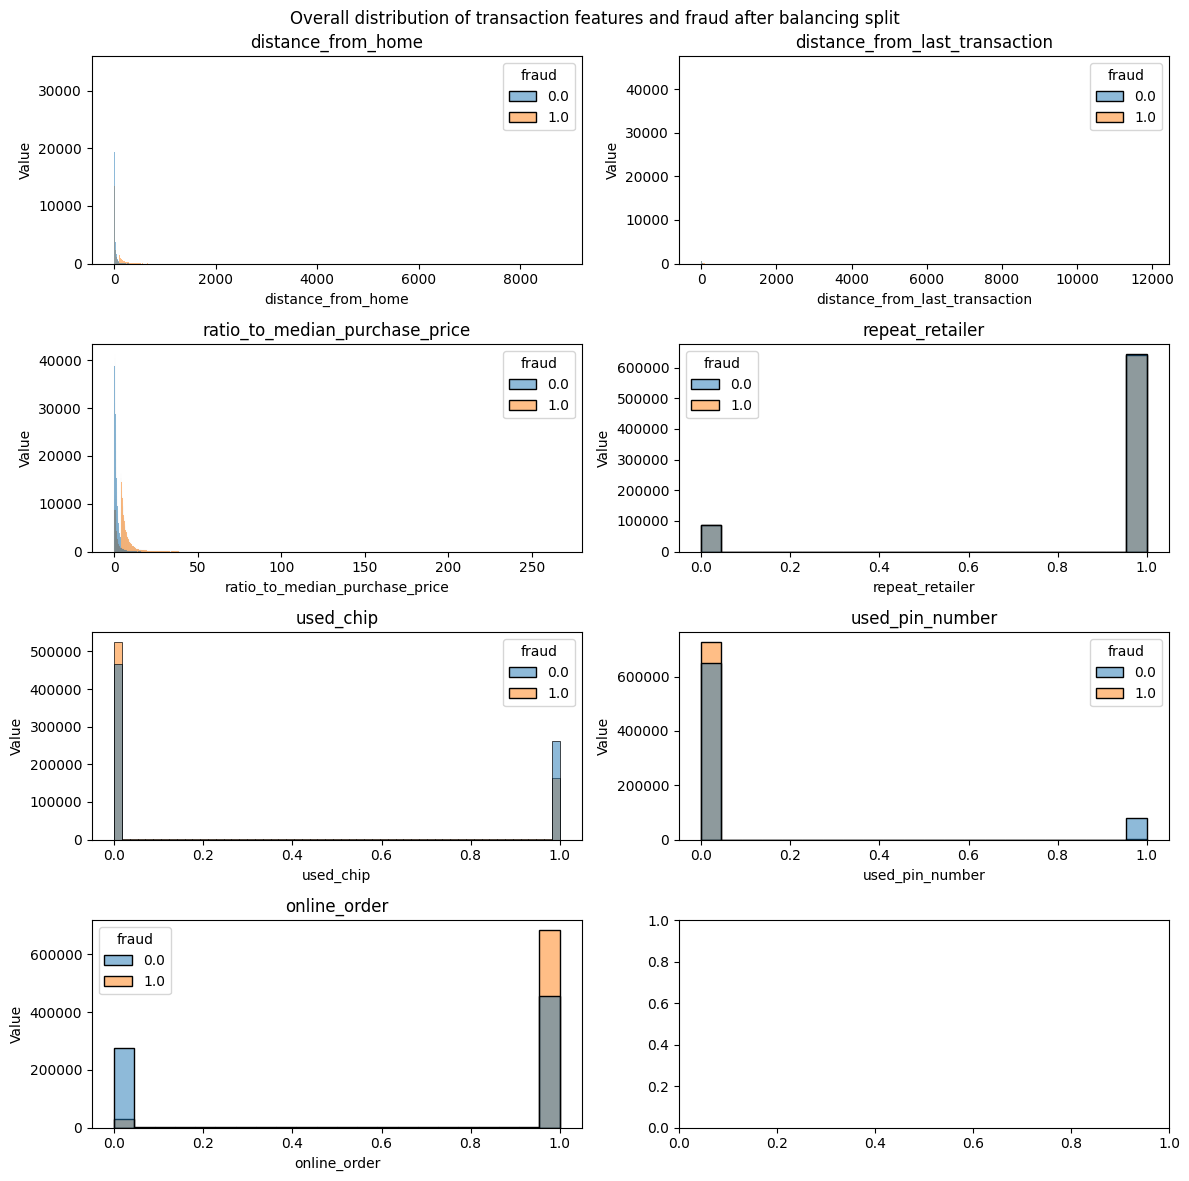

In [ ]:
#Plotting the dataset on unsampled data
features2 = xy_train_bal.columns.tolist()[:-1]
fig2, axes2 = plt.subplots(4, 2, figsize = (12,12))
axes2 = axes2.ravel()

for i, feature in enumerate(features2):
  sns.histplot(data=xy_train_bal, x=feature, hue='fraud', ax=axes2[i])
  axes2[i].set_xlabel(feature)
  axes2[i].set_ylabel('Value')
  axes2[i].set_title(f"{feature}")

plt.suptitle('Overall distribution of transaction features and fraud after balancing split')
plt.tight_layout()
plt.show()

In [ ]:
# identifying the best features
corr = xy_train_bal.corr()
corr.style.background_gradient(cmap='coolwarm')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.018394,-0.083814,0.156983,-0.108566,-0.038030,0.062091,0.212979
distance_from_last_transaction,-0.018394,1.000000,-0.042011,-0.016493,-0.036726,-0.018955,0.025054,0.110334
ratio_to_median_purchase_price,-0.083814,-0.042011,1.000000,-0.040586,0.030283,-0.090563,0.143744,0.482010
repeat_retailer,0.156983,-0.016493,-0.040586,1.000000,-0.004555,0.001265,0.072838,-0.002438
used_chip,-0.108566,-0.036726,0.030283,-0.004555,1.000000,0.020305,-0.027697,-0.117960
used_pin_number,-0.038030,-0.018955,-0.090563,0.001265,0.020305,1.000000,-0.078470,-0.233742
online_order,0.062091,0.025054,0.143744,0.072838,-0.027697,-0.078470,1.000000,0.400629
fraud,0.212979,0.110334,0.482010,-0.002438,-0.117960,-0.233742,0.400629,1.000000


In [ ]:
sorted_corr = corr['fraud'].abs().sort_values(ascending=False)
sorted_corr

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.482010
online_order,0.400629
used_pin_number,0.233742
distance_from_home,0.212979
used_chip,0.117960
distance_from_last_transaction,0.110334
repeat_retailer,0.002438


In [ ]:
#normalizing
scaler = StandardScaler()
x_train_bal = scaler.fit_transform(x_train_bal)
x_test = scaler.transform(x_test)

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_bal, y_train_bal)
y_pred = svm.predict(x_test)